In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/racheldyap/Desktop/DataScienceFoundations/Session_3/responses.csv')

In [3]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
df.shape

(1010, 150)

In [5]:
df.isnull().sum()

Music                          3
Slow songs or fast songs       2
Dance                          4
Folk                           5
Country                        5
Classical music                7
Musical                        2
Pop                            3
Rock                           6
Metal or Hardrock              3
Punk                           8
Hiphop, Rap                    4
Reggae, Ska                    7
Swing, Jazz                    6
Rock n roll                    7
Alternative                    7
Latino                         8
Techno, Trance                 7
Opera                          1
Movies                         6
Horror                         2
Thriller                       1
Comedy                         3
Romantic                       3
Sci-fi                         2
War                            2
Fantasy/Fairy tales            3
Animated                       3
Documentary                    8
Western                        4
          

In [6]:
#cleaning data, removing nan values

In [7]:
data1 = df.dropna(axis=0)
data1.shape

(674, 150)

In [8]:
# how can I get all the column headers in my data table? 

In [9]:
data1.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats


In [10]:
data1.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,...,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,4.762611,3.295252,3.078635,2.264095,2.117211,2.982196,2.759644,3.451039,3.787834,2.354599,...,3.258160,3.026706,3.191395,3.096439,2.850148,3.514837,20.353116,173.419881,66.117211,1.299703
std,0.594699,0.795833,1.179841,1.120517,1.063888,1.244176,1.281403,1.165938,1.152979,1.396371,...,1.305537,1.305787,1.180771,1.208398,1.299140,1.076806,2.732763,9.475720,13.900289,0.992887
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,152.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,20.000000,172.000000,63.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,21.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,203.000000,150.000000,10.000000


### Gender by Age

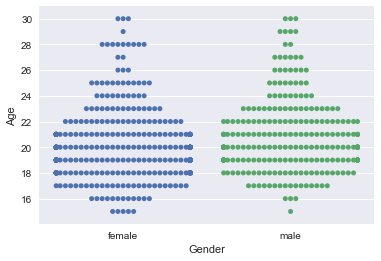

In [22]:
sns.swarmplot(x="Gender",y="Age", data=data1)

In [11]:
data1.groupby(data1.Gender).agg({'Age':'mean', "Height":'mean', "Weight":'mean'})[['Age','Height','Weight']].reset_index

<bound method DataFrame.reset_index of               Age      Height     Weight
Gender                                  
female  20.052239  167.810945  58.669154
male    20.797794  181.709559  77.125000>

### Smokers by Age

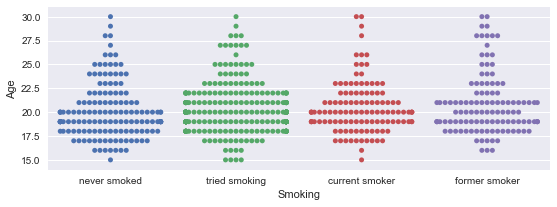

In [12]:
plt.figure(figsize=[9,3])
sns.swarmplot(x="Smoking", y="Age", data=data1)

From the graph above, we can see that most who try smoking starts around 18 years old, when they become of legal age. 

But as they near 25 years old, we see there is a decrease in smokers up until the age of 30. 

In [13]:
# is this a good type of plot to show the dispersion of smokers based on age? 

### Smokers by Age and Educational Background

We want to check if the Educational Background has any correlation between Smoking and Age

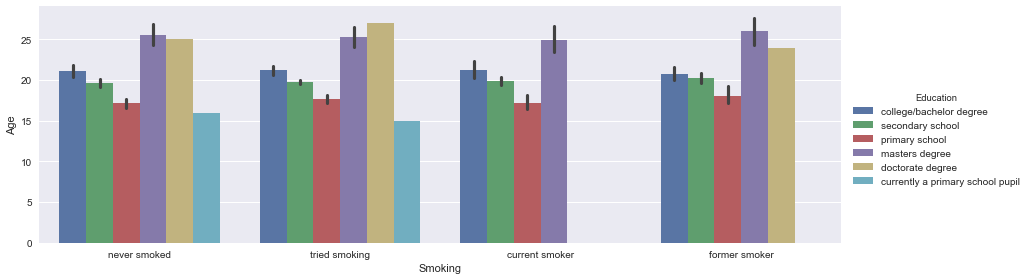

In [80]:
sns.factorplot("Smoking","Age","Education", data=data1, kind='bar',size=4, aspect=3)

If we consider their educational background, we can see that only those with doctorate degree have kicked off the habit of smoking. 

Aside from that, this graph shows us no other apparent difference in smoking habits across Educational background.

### Educational Background and Happiness

In [89]:
# Is there a correlation between those highly stressed and their smoking habits

In [84]:
# aggregate current smokers, and plot stress levels

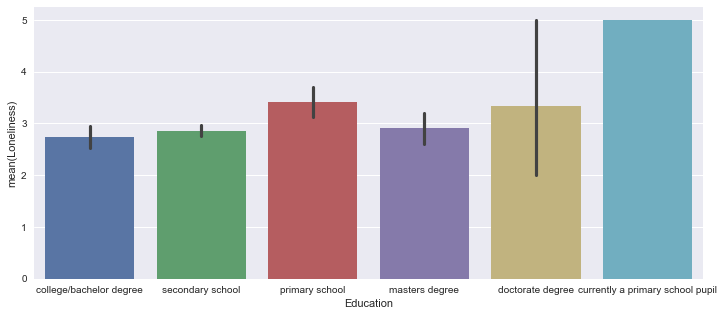

In [100]:
plt.figure(figsize=[12,5])
sns.barplot(x="Education", y="Loneliness", data=data1)

Now, we take a look at if there is any relationship between feelings of loneliness (1 being not lonely to 5 being very lonely).

In the graph above, on average people who are currently primary school pupils have the highest loneliness score as compared to those with higher educational achievements

### Age

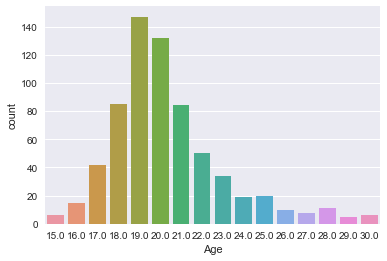

In [18]:
sns.countplot(data1['Age'])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


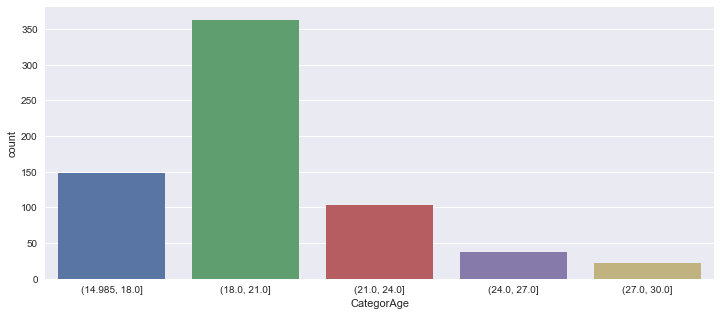

In [14]:
plt.figure(figsize=[12,5])
data1['CategorAge']= pd.cut(data1['Age'], 5)
sns.countplot(data1['CategorAge'])

### Internet Usage and Happiness

In [22]:
def get_stage(person):
    age,gender= person
    return 'teen' if age<19 else gender
    
data1['Teen']= data1[["Age", "Gender"]].apply(get_stage, axis=1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


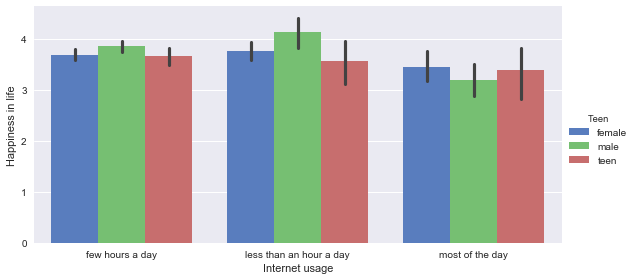

In [21]:
sns.factorplot('Internet usage','Happiness in life', 'Teen', data=data1, kind='bar', palette="muted", legend='True', size=
               4, aspect=2)

we can see that in the graph above, the higher our exposure/use of internet, the less happy we tend to be, and this trend cuts across all age (from teens (18 and below), to adults (both male and female). 

However we note that the male adults tend to have lower levels of happiness compared to teen and female adults. 

#### Calculate for Family size :
 convert categorical vals to numerical
    for Only child no -0 , yes - 1

In [23]:
data1['Only child'] = data1['Only child'].map({"no":0, "yes":1}).astype(int)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
data1.dtypes

Music                          float64
Slow songs or fast songs       float64
Dance                          float64
Folk                           float64
Country                        float64
Classical music                float64
Musical                        float64
Pop                            float64
Rock                           float64
Metal or Hardrock              float64
Punk                           float64
Hiphop, Rap                    float64
Reggae, Ska                    float64
Swing, Jazz                    float64
Rock n roll                    float64
Alternative                    float64
Latino                         float64
Techno, Trance                 float64
Opera                          float64
Movies                         float64
Horror                         float64
Thriller                       float64
Comedy                         float64
Romantic                       float64
Sci-fi                         float64
War                      

In [46]:
data1["Family Size"] = data1["Number of siblings"]+3

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
data1["Family Size"].head()

0    4.0
1    5.0
2    5.0
4    4.0
5    4.0
Name: Family Size, dtype: float64

#### accoring to data: 
Given:
    
a. 'NO' then there should be >0 values in Column 'Number of Siblings' 

b. 'YES',  Column 'Number of Siblings' should be = 0 

How do I clean the data when there are inconsistent/wrong reported values? 
>I thought that I should check first

    1. if 'Only Child' = "No", then ^Family Size = 3 [2(parents) + 1 (respondent)] + Number of Siblings

    2. then if 'Only Child' = "YES", then ^Family Size = 3 (Parents and Child/respondent)



g = sns.FacetGrid(df, col="Sex", row="Pclass", margin_titles=True)
g.map(plt.scatter, "Fare", "Age")

g.fig.suptitle("Title")
plt.show()

In [50]:
#### Sactter: Number of Friends, Family Size Categ: Village - town, Alcohol 

Text(0.5,0.98,'Title')

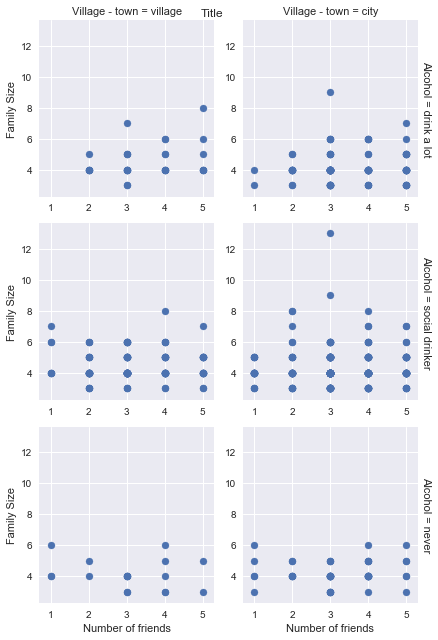

In [56]:
graph = sns.FacetGrid(data1, col='Village - town', row='Alcohol', margin_titles=True)
graph.map(plt.scatter, "Number of friends", "Family Size")

graph.fig.suptitle("Title")